c:\MY_CODE\GitHubRepos\Travel-App-AI\AI\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cluster
-1     1711
 10      51
 5       22
 11      17
 12      16
 2       14
 8       14
 4       11
 7        9
 0        8
 6        8
 9        7
 1        6
 3        5
Name: count, dtype: int64


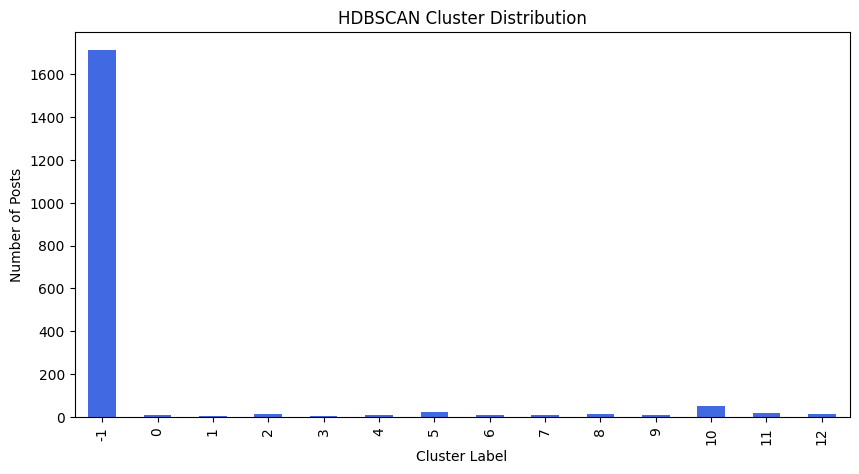

In [ ]:
import pandas as pd
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
csv_file_path = "../caption_from_body/posts_caption_from_body.csv"  # Update with your actual file path
df = pd.read_csv(csv_file_path)

# Combine Caption and Body for text analysis
df["text"] = df["Caption"].fillna("") + " " + df["Body"].fillna("")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
text_vectors = vectorizer.fit_transform(df["text"])

# Apply HDBSCAN Clustering
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric="cosine", cluster_selection_method="eom")
df["Cluster"] = hdbscan_clusterer.fit_predict(text_vectors)

# Save clustered data
df.to_csv("../caption_from_body/posts_hdbscan_clustered.csv", index=False)

# Print cluster distribution
print(df["Cluster"].value_counts())

# Plot cluster sizes
df["Cluster"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color="royalblue")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Posts")
plt.title("HDBSCAN Cluster Distribution")
plt.show()
